In [ ]:
# Credit Card Fraud Detection - Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from scipy.stats import ks_2samp
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/data/train.csv')
print(f"Dataset Shape: {df.shape}")


Dataset Shape: (170884, 31)


In [ ]:
"""Provide basic information about the dataset"""
print("=== Basic Data Overview ===")
print("First few rows:")
print(df.head())


=== Basic Data Overview ===
First few rows:
       Time        V1        V2        V3        V4        V5        V6  \
0  119191.0  2.052427 -0.133236 -1.740621  0.277935  0.337999 -0.826933   
1   71750.0  1.220356 -0.159191 -0.444349 -0.094437  0.104457 -0.345790   
2  151977.0  0.892824 -1.440698 -0.637940  3.912871  0.099291  2.433288   
3   55709.0 -3.146021  2.247634  0.901397  0.146162 -2.109360 -0.148312   
4   66654.0  1.194996 -0.007495  0.301285  0.750199 -0.297494 -0.405836   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.334629 -0.227039  0.267655  ... -0.006518  0.121300  0.037733 -0.356498   
1  0.170867 -0.094996  0.187572  ... -0.088775 -0.364654 -0.140851 -0.707308   
2 -0.308891  0.603227 -0.113826  ...  0.484969  0.487304 -0.122694 -0.598803   
3 -1.533191  2.073663  0.499394  ...  0.050567 -0.037019  0.107000  0.392857   
4  0.060410 -0.150482  0.400860  ... -0.234931 -0.545566 -0.089418 -0.064036   

        V25       V26   

In [ ]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170884 non-null  float64
 1   V1      170884 non-null  float64
 2   V2      170884 non-null  float64
 3   V3      170884 non-null  float64
 4   V4      170884 non-null  float64
 5   V5      170884 non-null  float64
 6   V6      170884 non-null  float64
 7   V7      170884 non-null  float64
 8   V8      170884 non-null  float64
 9   V9      170884 non-null  float64
 10  V10     170884 non-null  float64
 11  V11     170884 non-null  float64
 12  V12     170884 non-null  float64
 13  V13     170884 non-null  float64
 14  V14     170884 non-null  float64
 15  V15     170884 non-null  float64
 16  V16     170884 non-null  float64
 17  V17     170884 non-null  float64
 18  V18     170884 non-null  float64
 19  V19     170884 non-null  float64
 20  V20     170884 non-null  float64
 

In [ ]:
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
                Time             V1             V2             V3  \
count  170884.000000  170884.000000  170884.000000  170884.000000   
mean    94966.107886      -0.001070      -0.000904      -0.002722   
std     47464.723773       1.958944       1.650481       1.521820   
min         0.000000     -46.855047     -63.344698     -48.325589   
25%     54348.000000      -0.922071      -0.599127      -0.896376   
50%     84923.500000       0.016603       0.065839       0.177007   
75%    139404.000000       1.316250       0.802518       1.028302   
max    172792.000000       2.451888      22.057729       4.226108   

                  V4             V5             V6             V7  \
count  170884.000000  170884.000000  170884.000000  170884.000000   
mean       -0.002603       0.000151       0.000779      -0.000811   
std         1.416490       1.394123       1.338331       1.260122   
min        -5.683171    -113.743307     -23.496714     -43.557242   
25%        -0.8

In [ ]:
print("/nMissing Values:")
print(df.isnull().sum())

/nMissing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
"""Analyze and visualize the class distribution"""
print("=== Class Distribution Analysis ===")

# Calculate class distribution
class_dist = df['Class'].value_counts()
print("Class Distribution:")
print(class_dist)

=== Class Distribution Analysis ===
Class Distribution:
Class
0    170579
1       305
Name: count, dtype: int64


In [ ]:
fraud_percentage = (class_dist[1] / len(df)) * 100
print(f"Fraud Transactions: {fraud_percentage:.2f}%")

Fraud Transactions: 0.18%


- The output shows a highly imbalanced dataset. The vast majority of transactions are normal (Class 0), while fraudulent transactions (Class 1) are a tiny fraction (around 0.17%).
- This imbalance poses a challenge for machine learning models, as they might be biased towards predicting the majority class. You'll likely need to address this using techniques like oversampling, undersampling, or using appropriate evaluation metrics (e.g., precision, recall, F1-score).

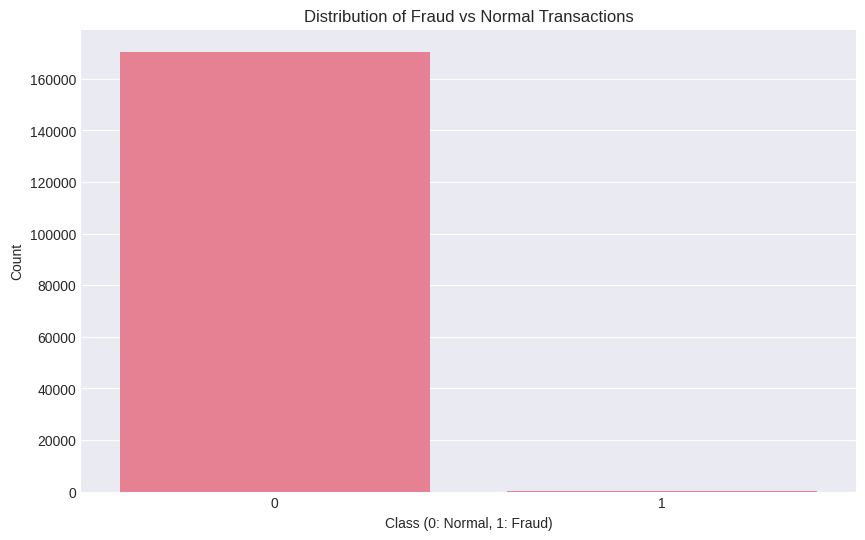

In [ ]:
# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Class')
plt.title('Distribution of Fraud vs Normal Transactions')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Count')
plt.show()

In [ ]:
"""Analyze the features in the dataset"""
print("=== Feature Analysis ===")

# Time and Amount analysis
print("Time and Amount Statistics:")
print(df[['Time', 'Amount']].describe())

=== Feature Analysis ===
Time and Amount Statistics:
                Time         Amount
count  170884.000000  170884.000000
mean    94966.107886      88.511723
std     47464.723773     256.737144
min         0.000000       0.000000
25%     54348.000000       5.637500
50%     84923.500000      22.020000
75%    139404.000000      77.650000
max    172792.000000   25691.160000


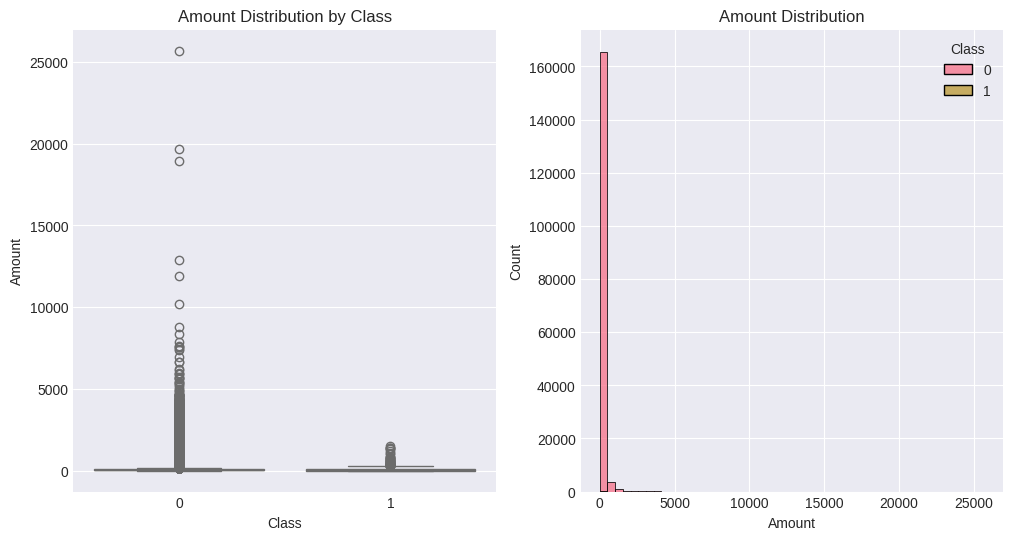

In [ ]:
# Visualize Amount distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Class', y='Amount')
plt.title('Amount Distribution by Class')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Amount', hue='Class', multiple="stack", bins=50)
plt.title('Amount Distribution')
plt.show()

In [ ]:
# Analyze anonymous features
print("Anonymous Features Statistics:")
v_columns = [col for col in df.columns if col.startswith('V')]

# Calculate skewness and kurtosis
skewness = df[v_columns].skew()
kurtosis = df[v_columns].kurtosis()

print("Top 5 Most Skewed Features:")
print(skewness.sort_values(ascending=False).head())

Anonymous Features Statistics:
Top 5 Most Skewed Features:
V28    5.064013
V7     4.421435
V21    3.463795
V6     2.234061
V10    1.003994
dtype: float64


Feature Analysis:

- Time and Amount: The 'Time' feature likely needs to be transformed (e.g., into hours of the day or day of the week) to extract meaningful patterns. 'Amount' has a wide range and might require scaling or transformation to improve model performance.
- V features: Skewness and kurtosis values give you an idea about the distribution of these anonymized features. High skewness indicates a long tail, and high kurtosis suggests heavy tails with more extreme values. These features might benefit from transformations to make their distributions more normal.

=== Correlation Analysis ===


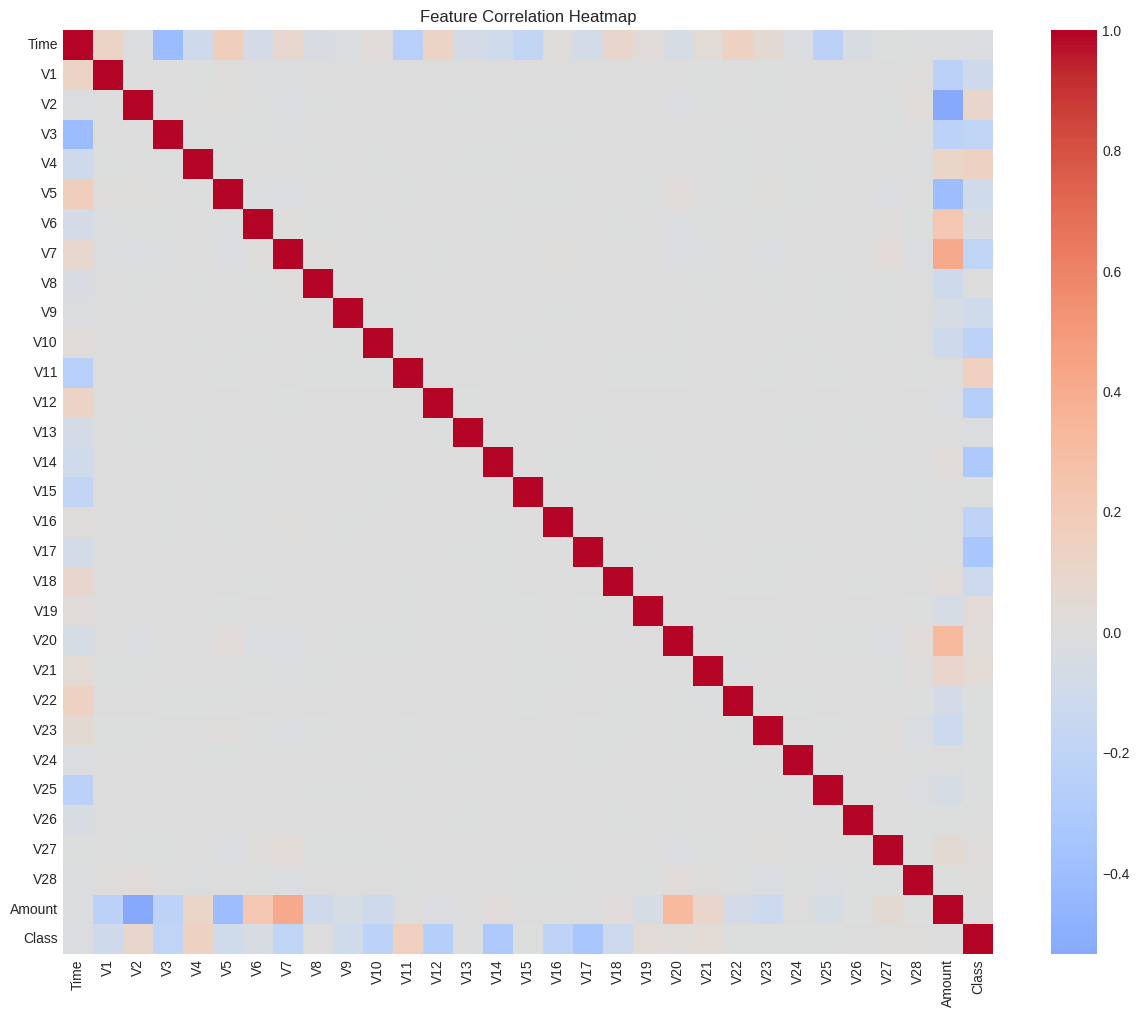

In [ ]:
"""Analyze correlations between features"""
print("=== Correlation Analysis ===")

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()
# Find highly correlated features
threshold = 0.8
high_corr = np.where(np.abs(correlation_matrix) > threshold)
high_corr = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y])
              for x, y in zip(*high_corr) if x != y]

if high_corr:
    print("/nHighly Correlated Feature Pairs (|correlation| > 0.8):")
    for feat1, feat2, corr in high_corr:
        print(f"{feat1} - {feat2}: {corr:.3f}")

Correlation Analysis:

- If the heatmap or the list of highly correlated features reveals strong correlations, it suggests redundancy in the data.


In [ ]:
"""Analyze feature importance using statistical tests"""
print("=== Feature Importance Analysis ===")

# Perform Mann-Whitney U test for each feature
feature_importance = {}
for column in df.columns:
    if column not in ['Class', 'Time']:
        stat, p_value = stats.mannwhitneyu(
            df[df['Class'] == 0][column],
            df[df['Class'] == 1][column],
            alternative='two-sided'
        )
        feature_importance[column] = p_value

# Sort features by p-value
feature_importance = dict(sorted(feature_importance.items(), key=lambda x: x[1]))

print("Top 10 Most Important Features (based on Mann-Whitney U test):")
for feature, p_value in list(feature_importance.items())[:10]:
    print(f"{feature}: p-value = {p_value:.2e}")

=== Feature Importance Analysis ===
Top 10 Most Important Features (based on Mann-Whitney U test):
V14: p-value = 1.12e-157
V12: p-value = 1.50e-153
V4: p-value = 7.21e-153
V11: p-value = 1.27e-138
V10: p-value = 4.53e-135
V3: p-value = 3.72e-131
V2: p-value = 8.86e-100
V7: p-value = 2.01e-93
V16: p-value = 5.82e-93
V9: p-value = 1.74e-87


/n=== Time-based Analysis ===


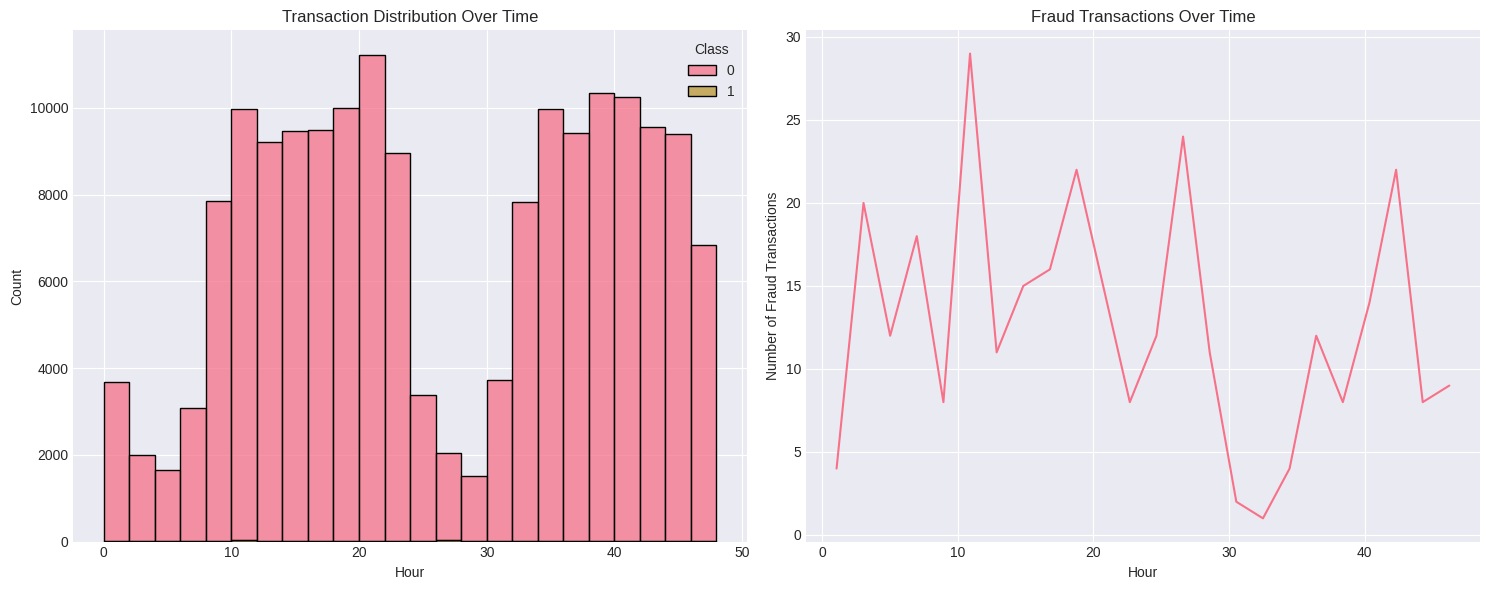

In [ ]:
"""Analyze patterns in transaction time"""
print("/n=== Time-based Analysis ===")

# Convert time to hours
df['Hour'] = df['Time'] / 3600

# Plot time distribution
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Hour', hue='Class', multiple="stack", bins=24)
plt.title('Transaction Distribution Over Time')
plt.xlabel('Hour')

plt.subplot(1, 2, 2)
fraud_by_hour = df[df['Class'] == 1]['Hour'].value_counts(bins=24).sort_index()
plt.plot(fraud_by_hour.index.mid, fraud_by_hour.values)
plt.title('Fraud Transactions Over Time')
plt.xlabel('Hour')
plt.ylabel('Number of Fraud Transactions')

plt.tight_layout()
plt.show()

The plots and statistics might show patterns in fraud occurrence over time (e.g., certain hours or days might have higher fraud rates).

=== Outlier Analysis ===
Amount Feature Outlier Analysis:
Q1: 5.64
Q3: 77.65
IQR: 72.01
Lower bound: -102.38
Upper bound: 185.67


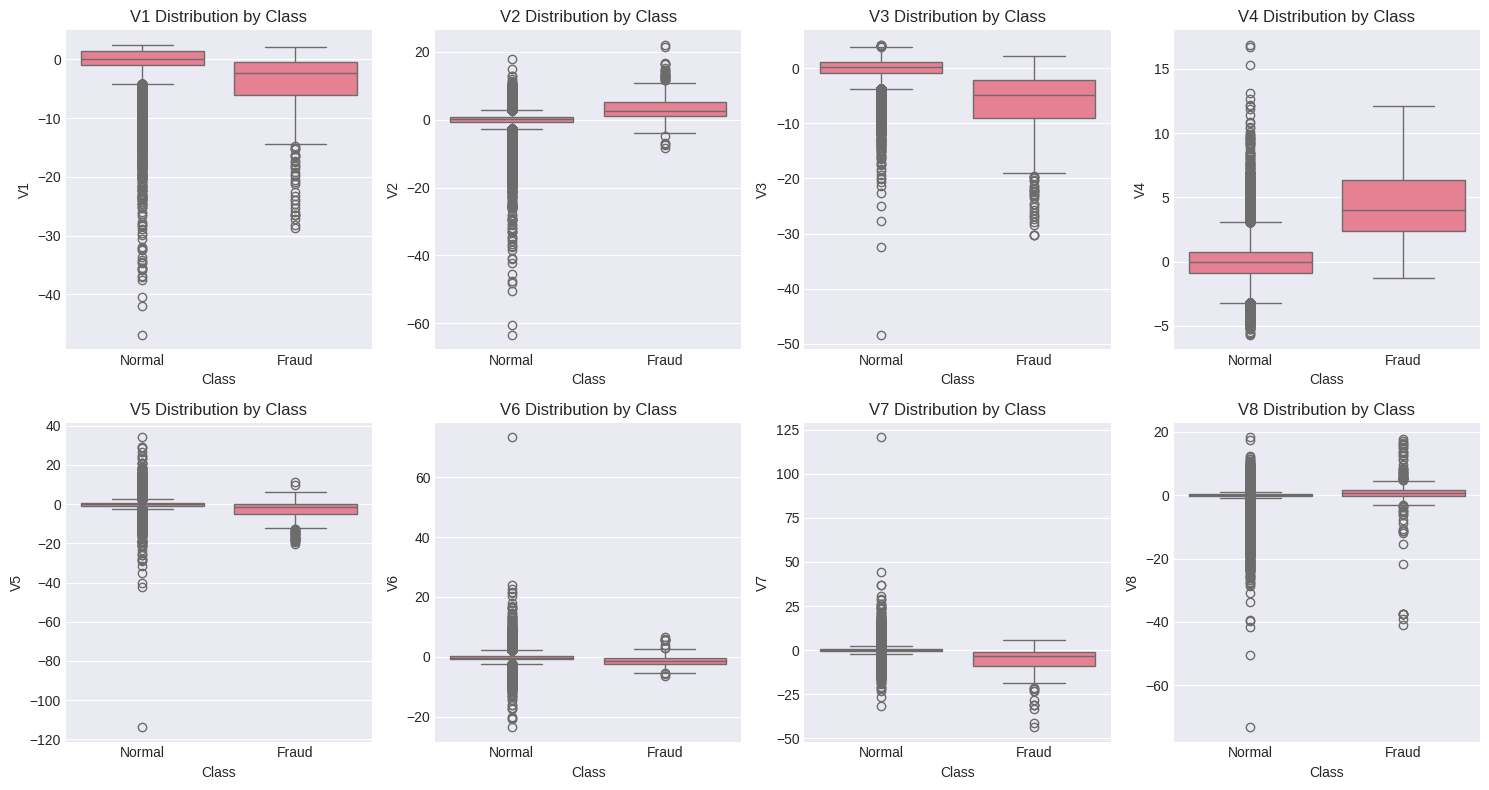

In [ ]:
# 7. Outlier Analysis
"""Detailed outlier analysis for each feature"""
print("=== Outlier Analysis ===")
def plot_feature_boxplots(df, features, rows, cols):
    plt.figure(figsize=(15, 4 * rows))
    for i, feature in enumerate(features, 1):
        plt.subplot(rows, cols, i)
        sns.boxplot(data=df, x='Class', y=feature)
        plt.title(f'{feature} Distribution by Class')
        plt.xticks([0, 1], ['Normal', 'Fraud'])
    plt.tight_layout()
    plt.show()
# Analyze Amount feature outliers
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

print("Amount Feature Outlier Analysis:")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {(Q1 - 1.5 * IQR):.2f}")
print(f"Upper bound: {(Q3 + 1.5 * IQR):.2f}")

# Plot boxplots for V features
v_features = [f'V{i}' for i in range(1, 29)]
plot_feature_boxplots(df, v_features[:8], 2, 4)  # First 8 features

In [ ]:
# Calculate outlier percentage for each feature
print("\nOutlier Percentage by Feature:")
for column in df.columns:
    if column not in ['Class', 'Time']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
        outlier_pct = (len(outliers) / len(df)) * 100
        print(f"{column}: {outlier_pct:.2f}%")


Outlier Percentage by Feature:
V1: 2.49%
V2: 4.77%
V3: 1.19%
V4: 3.99%
V5: 4.35%
V6: 8.05%
V7: 3.16%
V8: 8.60%
V9: 2.95%
V10: 3.35%
V11: 0.27%
V12: 5.42%
V13: 1.17%
V14: 4.93%
V15: 1.01%
V16: 2.91%
V17: 2.59%
V18: 2.68%
V19: 3.62%
V20: 9.76%
V21: 5.18%
V22: 0.45%
V23: 6.55%
V24: 1.67%
V25: 1.88%
V26: 1.94%
V27: 13.61%
V28: 10.57%
Amount: 11.06%
Hour: 0.00%



=== Distribution Analysis ===


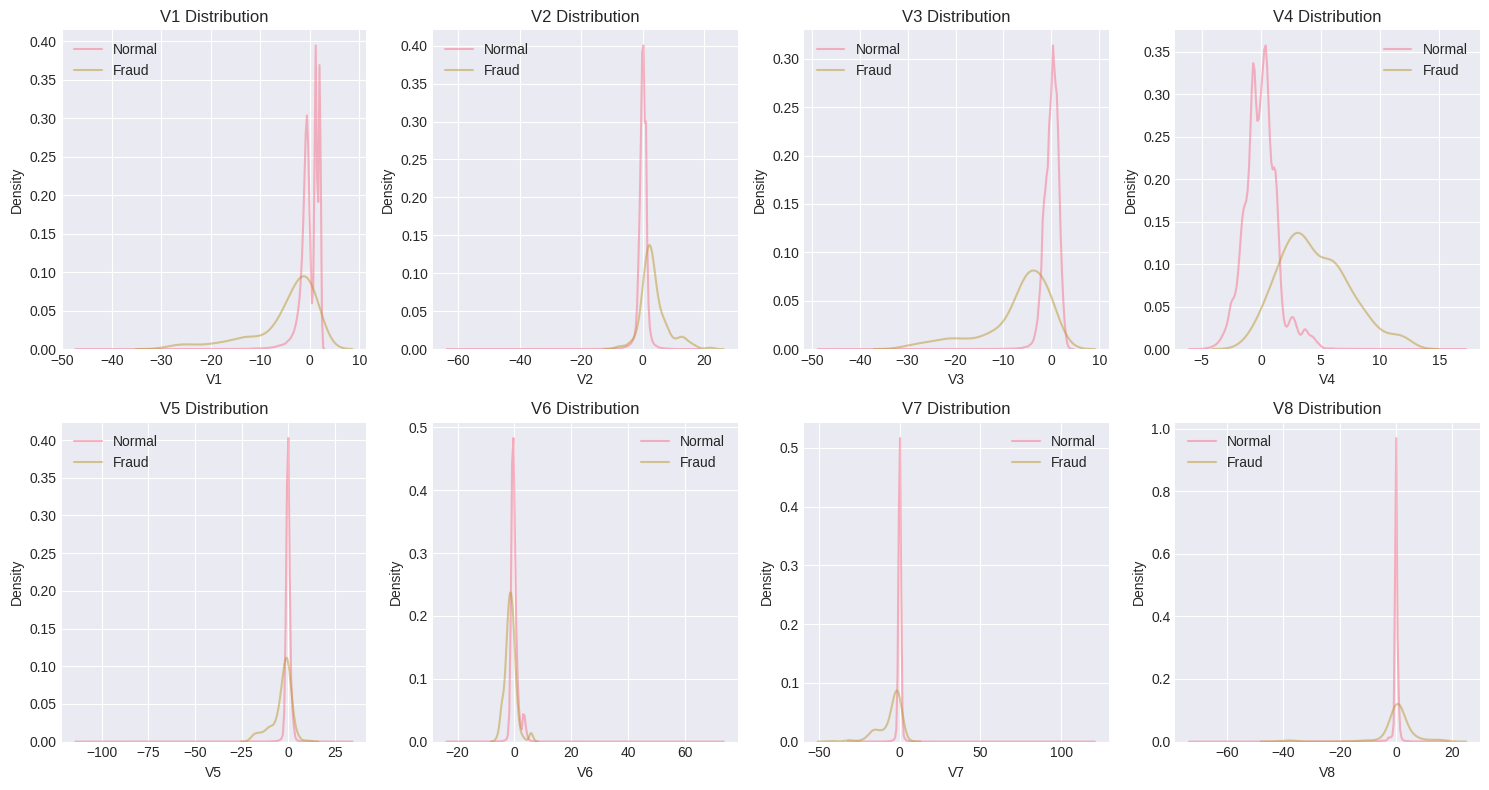

In [ ]:
# 8. Distribution Analysis
"""Analyze and compare distributions between normal and fraudulent transactions"""
print("\n=== Distribution Analysis ===")

def plot_feature_distributions(df, features, rows, cols):
    plt.figure(figsize=(15, 4 * rows))
    for i, feature in enumerate(features, 1):
        plt.subplot(rows, cols, i)
        sns.kdeplot(data=df[df['Class'] == 0][feature], label='Normal', alpha=0.5)
        sns.kdeplot(data=df[df['Class'] == 1][feature], label='Fraud', alpha=0.5)
        plt.title(f'{feature} Distribution')
        plt.legend()
    plt.tight_layout()
    plt.show()

# Analyze distributions of first 8 V features
v_features = [f'V{i}' for i in range(1, 9)]
plot_feature_distributions(df, v_features, 2, 4)

In [ ]:
# Perform Kolmogorov-Smirnov test for each feature
print("\nKolmogorov-Smirnov Test Results:")
for column in df.columns:
    if column not in ['Class', 'Time']:
        ks_stat, p_value = ks_2samp(
            df[df['Class'] == 0][column],
            df[df['Class'] == 1][column]
        )
        print(f"{column}: KS statistic = {ks_stat:.3f}, p-value = {p_value:.2e}")


Kolmogorov-Smirnov Test Results:
V1: KS statistic = 0.481, p-value = 2.33e-65
V2: KS statistic = 0.632, p-value = 2.18e-118
V3: KS statistic = 0.686, p-value = 6.63e-143
V4: KS statistic = 0.774, p-value = 1.69e-192
V5: KS statistic = 0.465, p-value = 7.80e-61
V6: KS statistic = 0.485, p-value = 2.08e-66
V7: KS statistic = 0.644, p-value = 1.53e-123
V8: KS statistic = 0.360, p-value = 7.55e-36
V9: KS statistic = 0.559, p-value = 4.12e-90
V10: KS statistic = 0.790, p-value = 4.81e-203
V11: KS statistic = 0.754, p-value = 7.23e-180
V12: KS statistic = 0.779, p-value = 1.20e-195
V13: KS statistic = 0.121, p-value = 2.42e-04
V14: KS statistic = 0.829, p-value = 4.87e-232
V15: KS statistic = 0.056, p-value = 2.76e-01
V16: KS statistic = 0.686, p-value = 6.87e-143
V17: KS statistic = 0.743, p-value = 2.53e-173
V18: KS statistic = 0.512, p-value = 1.95e-74
V19: KS statistic = 0.338, p-value = 1.50e-31
V20: KS statistic = 0.360, p-value = 7.58e-36
V21: KS statistic = 0.508, p-value = 2.84e-73


=== PCA Analysis ===


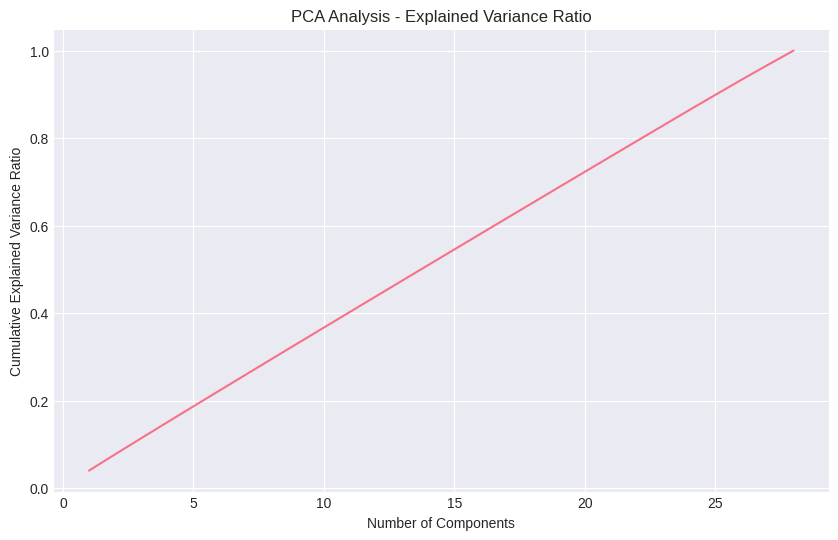

In [ ]:
# 9. PCA Analysis
"""Perform PCA analysis on the features"""
print("\n=== PCA Analysis ===")

# Prepare data for PCA
v_features = [col for col in df.columns if col.startswith('V')]
X = df[v_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
          np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Analysis - Explained Variance Ratio')
plt.grid(True)
plt.show()


PCA Components Explained Variance Ratio:
PC1: 0.0398
PC2: 0.0372
PC3: 0.0368
PC4: 0.0365
PC5: 0.0363
PC6: 0.0362
PC7: 0.0361
PC8: 0.0360
PC9: 0.0359
PC10: 0.0358


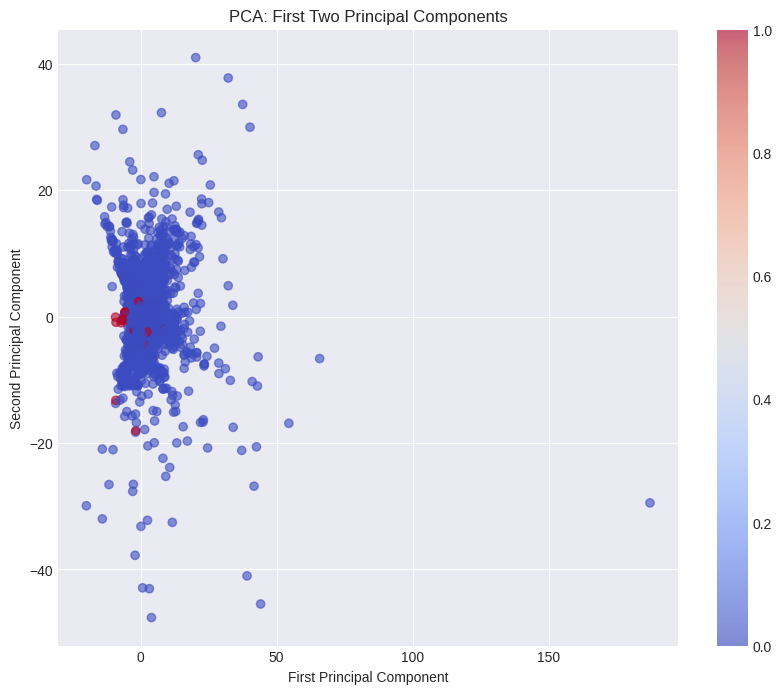

In [ ]:
# Print component importance
print("\nPCA Components Explained Variance Ratio:")
for i, ratio in enumerate(pca.explained_variance_ratio_[:10], 1):
    print(f"PC{i}: {ratio:.4f}")

# Visualize first two principal components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Class'],
                      cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First Two Principal Components')
plt.show()



=== Amount-Time Relationship Analysis ===


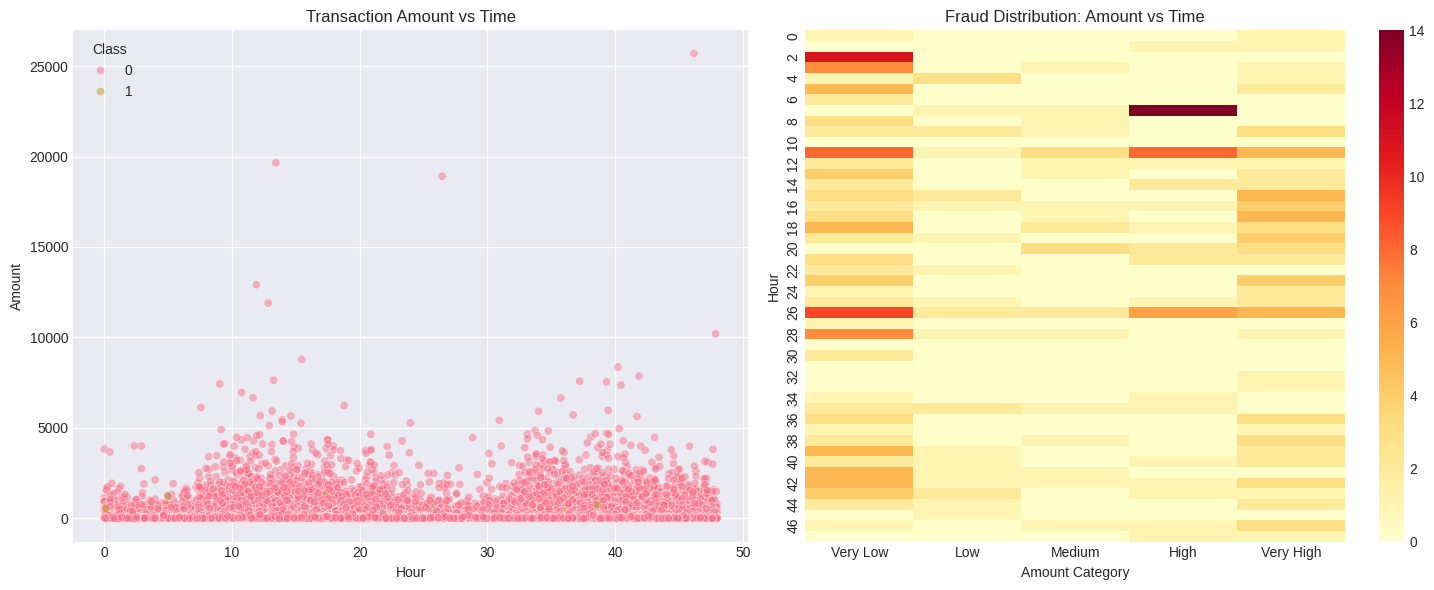

In [ ]:
# 10. Amount-Time Relationship Analysis
"""Analyze relationship between transaction amount and time"""
print("\n=== Amount-Time Relationship Analysis ===")

# Convert time to hours
df['Hour'] = df['Time'] / 3600

# Create amount bins
df['Amount_Bin'] = pd.qcut(df['Amount'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Plot amount distribution over time
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Hour', y='Amount', hue='Class', alpha=0.5)
plt.title('Transaction Amount vs Time')
plt.xlabel('Hour')
plt.ylabel('Amount')

plt.subplot(1, 2, 2)
fraud_pivot = pd.crosstab(df['Hour'].astype(int), df['Amount_Bin'], values=df['Class'], aggfunc='sum')
sns.heatmap(fraud_pivot, cmap='YlOrRd')
plt.title('Fraud Distribution: Amount vs Time')
plt.xlabel('Amount Category')
plt.ylabel('Hour')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate fraud rates by amount category
print("\nFraud Rate by Amount Category:")
fraud_rate = df.groupby('Amount_Bin')['Class'].mean() * 100
print(fraud_rate)


Fraud Rate by Amount Category:
Amount_Bin
Very Low     0.371074
Low          0.076164
Medium       0.070221
High         0.134123
Very High    0.240844
Name: Class, dtype: float64



=== Local Outlier Analysis ===


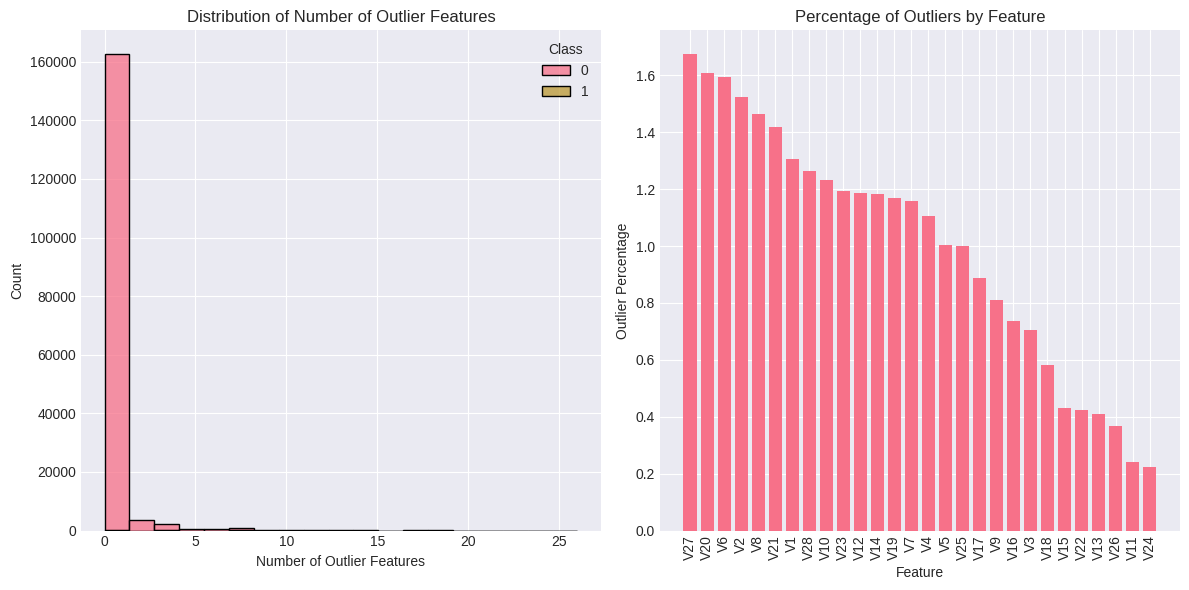

In [ ]:
# 11. Local Outlier Analysis
"""Analyze local patterns and outliers in the feature space"""
print("\n=== Local Outlier Analysis ===")

# Select features for analysis
v_features = [f'V{i}' for i in range(1, 29)]

# Calculate z-scores for each feature
z_scores = {}
for feature in v_features:
    z_scores[feature] = np.abs(stats.zscore(df[feature]))

# Identify local outliers
threshold = 3
local_outliers = pd.DataFrame(z_scores) > threshold

# Calculate outlier counts per transaction
outlier_counts = local_outliers.sum(axis=1)

# Plot distribution of outlier counts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x=outlier_counts, hue='Class', multiple="stack")
plt.title('Distribution of Number of Outlier Features')
plt.xlabel('Number of Outlier Features')

plt.subplot(1, 2, 2)
outlier_features = local_outliers.sum() / len(df) * 100
outlier_features.sort_values(ascending=False, inplace=True)
plt.bar(range(len(outlier_features)), outlier_features)
plt.title('Percentage of Outliers by Feature')
plt.xlabel('Feature')
plt.ylabel('Outlier Percentage')
plt.xticks(range(len(outlier_features)), outlier_features.index, rotation=90)

plt.tight_layout()
plt.show()


In [ ]:
# Print features with highest outlier percentages
print("\nTop 10 Features with Highest Outlier Percentages:")
print(outlier_features.head(10))


Top 10 Features with Highest Outlier Percentages:
V27    1.674235
V20    1.609279
V6     1.594649
V2     1.522085
V8     1.464151
V21    1.417336
V1     1.306149
V28    1.262845
V10    1.232415
V23    1.194963
dtype: float64
